In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('standardized.csv')

In [3]:
data = data.loc[:, data.columns != 'Unnamed: 0']

In [4]:
data.describe()

,y,start_speed,end_speed,pfx_x,pfx_z,pz,z0,vz0,vy0,ax,...,spin_dir,spin_rate,Fastballs,Sinker,Slider,Curveballs,Splitter,Changeup,Knuckleball,IN
count,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,...,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000,715316.000000
mean,0.693409,0.725160,0.715583,0.444994,0.623409,0.490545,0.561908,0.463637,0.267406,0.407911,...,0.501235,0.313907,0.505090,0.122659,0.153437,0.090686,0.014683,0.101551,0.006221,0.005673
std,0.101365,0.105246,0.102385,0.135395,0.107321,0.083460,0.068444,0.099349,0.105308,0.130882,...,0.190171,0.121975,0.499974,0.328046,0.360409,0.287162,0.120281,0.302057,0.078628,0.075106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.631594,0.658662,0.655493,0.331478,0.564640,0.437693,0.524639,0.396066,0.187693,0.299894,...,0.377608,0.229818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.692315,0.749571,0.739292,0.428051,0.644382,0.490722,0.564389,0.457098,0.242860,0.396723,...,0.539931,0.332291,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.757115,0.804460,0.791434,0.552891,0.702779,0.543205,0.605032,0.524195,0.333722,0.509011,...,0.628096,0.402337,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715316 entries, 0 to 715315
Data columns (total 29 columns):
y                  715316 non-null float64
start_speed        715316 non-null float64
end_speed          715316 non-null float64
pfx_x              715316 non-null float64
pfx_z              715316 non-null float64
pz                 715316 non-null float64
z0                 715316 non-null float64
vz0                715316 non-null float64
vy0                715316 non-null float64
ax                 715316 non-null float64
az                 715316 non-null float64
ay                 715316 non-null float64
break_length       715316 non-null float64
break_y            715316 non-null float64
break_angle        715316 non-null float64
type_confidence    715316 non-null float64
zone               715316 non-null float64
nasty              715316 non-null float64
spin_dir           715316 non-null float64
spin_rate          715316 non-null float64
pitch_type         715316 non

In [6]:
# Hide one-hot encoding before inputting to model else learning will be too easy
modeling_data = data.iloc[:,0:21]

In [7]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715316 entries, 0 to 715315
Data columns (total 21 columns):
y                  715316 non-null float64
start_speed        715316 non-null float64
end_speed          715316 non-null float64
pfx_x              715316 non-null float64
pfx_z              715316 non-null float64
pz                 715316 non-null float64
z0                 715316 non-null float64
vz0                715316 non-null float64
vy0                715316 non-null float64
ax                 715316 non-null float64
az                 715316 non-null float64
ay                 715316 non-null float64
break_length       715316 non-null float64
break_y            715316 non-null float64
break_angle        715316 non-null float64
type_confidence    715316 non-null float64
zone               715316 non-null float64
nasty              715316 non-null float64
spin_dir           715316 non-null float64
spin_rate          715316 non-null float64
pitch_type         715316 non

In [8]:
modeling_data.pitch_type.unique()

array(['FF', 'SL', 'CU', 'SI', 'FC', 'FT', 'KC', 'CH', 'IN', 'KN', 'FS'],
      dtype=object)

In [9]:
# adjust pitch types to generalizations made previoulsy 

modeling_data['pitch_type'] = np.where((modeling_data['pitch_type']=='FF')|(modeling_data['pitch_type']=='FT')|(modeling_data['pitch_type']=='FC'),'FF', modeling_data['pitch_type'])
modeling_data['pitch_type'] = np.where((data['pitch_type']=='CU')|(data['pitch_type']=='KC'),'CB',modeling_data['pitch_type'])


In [10]:
modeling_data.pitch_type.unique()

# Dropping IN because I am not aware of what pitch type this is

array(['FF', 'SL', 'CB', 'SI', 'CH', 'IN', 'KN', 'FS'], dtype=object)

In [11]:
modeling_data = modeling_data[modeling_data.pitch_type != 'IN']

In [12]:
modeling_data.groupby('pitch_type').count()

# 7 pitch types 

,y,start_speed,end_speed,pfx_x,pfx_z,pz,z0,vz0,vy0,ax,az,ay,break_length,break_y,break_angle,type_confidence,zone,nasty,spin_dir,spin_rate
pitch_type,,,,,,,,,,,,,,,,,,,,
CB,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869,64869
CH,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641,72641
FF,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299,361299
FS,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503,10503
KN,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450,4450
SI,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740,87740
SL,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756,109756


In [13]:
len(modeling_data)

711258

In [14]:
# Majority Classifier would classify all pitches as FF (361299 / 711258) and achieve an accuracy of 50.7% (Baseline)

In [15]:
modeling_data.head()

,y,start_speed,end_speed,pfx_x,pfx_z,pz,z0,vz0,vy0,ax,...,ay,break_length,break_y,break_angle,type_confidence,zone,nasty,spin_dir,spin_rate,pitch_type
0,0.765180,0.722127,0.729981,0.447752,0.793395,0.434146,0.600417,0.301919,0.274028,0.415276,...,0.256981,0.092857,0.733333,0.245035,1.0,0.538462,0.47,0.508753,0.464681,FF
1,0.668026,0.785592,0.778399,0.421842,0.816150,0.517828,0.608010,0.337697,0.213625,0.387638,...,0.307775,0.060714,0.666667,0.266294,1.0,0.846154,0.25,0.521295,0.523598,FF
2,0.805692,0.770154,0.774674,0.465310,0.805679,0.405949,0.582552,0.259370,0.228590,0.432139,...,0.283283,0.075000,0.733333,0.212308,1.0,1.000000,0.64,0.499017,0.498344,FF
3,0.647770,0.782161,0.778399,0.439829,0.801248,0.531290,0.609945,0.356533,0.213873,0.405907,...,0.300102,0.067857,0.666667,0.247273,1.0,0.153846,0.49,0.512850,0.494905,FF
4,0.728748,0.819897,0.813780,0.448822,0.863270,0.459978,0.581956,0.256674,0.178353,0.414499,...,0.316359,0.017857,0.666667,0.215385,1.0,0.384615,0.32,0.506503,0.618316,FF


In [16]:
# Training & Test split
X = modeling_data.iloc[:,0:20]
y = modeling_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
y_pred = knn.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# FS with the non-satisfactory accuracy of 35%, rest are better than the baseline of 50.7%

[[ 19235    191     11     13     55      2   2061]
 [   285  19142   1750    381     36    430   1672]
 [    44   2070 108989     43      2   4336   3953]
 [    51   1630    264    951      1     67    481]
 [   218    109     18      3    997      0    142]
 [     3    931   6357     38      0  21590     40]
 [  2515   2128   3060    132     50     17  28222]]
              precision    recall  f1-score   support

          CB       0.86      0.89      0.88     21568
          CH       0.73      0.81      0.77     23696
          FF       0.90      0.91      0.91    119437
          FS       0.61      0.28      0.38      3445
          KN       0.87      0.67      0.76      1487
          SI       0.82      0.75      0.78     28959
          SL       0.77      0.78      0.78     36124

    accuracy                           0.85    234716
   macro avg       0.80      0.73      0.75    234716
weighted avg       0.85      0.85      0.85    234716



In [20]:
# Logistic Regression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs',max_iter = 1000)
logreg.fit(X_train, y_train)

# Failed: failed to converge

/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [21]:
y_pred = logreg.predict(X_test)

In [22]:
# Logistic Regression with GCD
clf = linear_model.SGDClassifier(loss='log',max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Couldn't create any accruacy for FS and KN

[[ 17975    424      5      0      0     17   3147]
 [   378  13256   4950      0      0   1639   3473]
 [    20    584 111250      0      0   2698   4885]
 [    25   1349    866      1      0    242    962]
 [   695    385      2      0      0      0    405]
 [    16    355  17761      0      0  10507    320]
 [  2502   1193   3809      0      0    102  28518]]


/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          CB       0.83      0.83      0.83     21568
          CH       0.76      0.56      0.64     23696
          FF       0.80      0.93      0.86    119437
          FS       1.00      0.00      0.00      3445
          KN       0.00      0.00      0.00      1487
          SI       0.69      0.36      0.48     28959
          SL       0.68      0.79      0.73     36124

    accuracy                           0.77    234716
   macro avg       0.68      0.50      0.51    234716
weighted avg       0.77      0.77      0.75    234716



In [25]:
# KNN with K-fold cross validation

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [26]:
print(cv_scores)

[0.85479494 0.86002306 0.86052217 0.85616973 0.85075466]


In [27]:
# Cross Validation takes ages to compute

In [28]:
# KNN with error rate to determine optimal K


error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Mean Error')

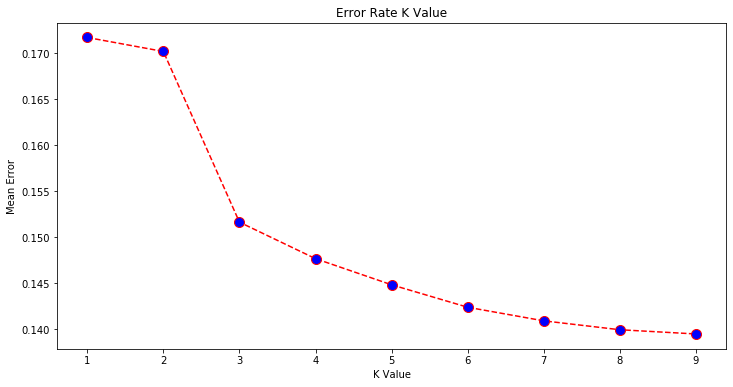

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')